# Online Shoppers Purchasing Intention Clustering

Isaiah Jenkins

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

## 1. About the data

1. a. Description

Throughout this analysis we will explore a dataset from UC Irvine's Machine Learning repository. This dataset consists of online shoppers purchasing habits and online activity. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

1. b. Data dictionary, 17 features, 10 numerical, 8 categorical

Administrative, Administrative Duration, Informational, Informational Duration, Product Related, Product Related Duration 
- The number of different types of pages visited by the visitor in that session and total time spent in each of these page categories
  
Bounce Rates, Exit Rates, Page Value
- Metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Special Day
- Indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

Month, Operating Systems, Browser, Traffic Type
- General information

Visitor Type 
- returning or new visitor category

Weekend
- Boolean value indicating whether the date of the visit is weekend
  
Revenue
- Whether shopper generated revenue for company

## 2. Objectives

Throughout this analysis we will explore and build different clustering models to segment between shoppers that did and did not buy products. Possible problems that could occur may include ineffective clustering because in the dataset there fewer samples ending with shoppers compared to non shoppers. From the dataset, 84.5% were negative class shoppers that did not end with shopping. However, with sophisticated clustering models we should be able to achieve proper segmentation.

## 3. Data Exploration, Cleaning and Feature Engineering

The Plan:

1. Explore the dataset's structure, including the number of rows, features, data types and any missing values.
2. Perform basic statistical analysis such as calculating descriptive statistics (mean, median) for numerical features and value counts for categorical features.
3. Create data visualizations such as a correlation matrix to explore the relationships between variables.
4. Identify and transform features that may be skewed.
5. Feature engineer relevant columns for models to effectively segment between shoppers that non shoppers.

### Load in data

In [2]:
shoppers = pd.read_csv('data/online_shoppers_intention.csv')

In [3]:
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Feature select by dropping less relevant information
shoppers = shoppers.drop(['SpecialDay', 'Month', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'], axis=1)

In [7]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   OperatingSystems         12330 non-null  int64  
 10  Revenue                  12330 non-null  bool   
dtypes: bool(1), float64(6), int64(4)
memory usage: 975.5 KB


In [8]:
# Check for correlations between features except categorical and target
non_categorical_features = [x for x in shoppers.columns if x not in ['Revenue']]

corr_matrix = shoppers[non_categorical_features].corr()

for i in range(len(non_categorical_features)):
    corr_matrix.iloc[i,i] = 0.0

corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems
Administrative,0.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.006347
Administrative_Duration,0.601583,0.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.007343
Informational,0.376850,0.302710,0.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.009527
Informational_Duration,0.255848,0.238031,0.618955,0.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.009579
ProductRelated,0.431119,0.289087,0.374164,0.280046,0.000000,0.860927,-0.204578,-0.292526,0.056282,0.004290
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,0.000000,-0.184541,-0.251984,0.052823,0.002976
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,0.000000,0.913004,-0.119386,0.023823
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,0.000000,-0.174498,0.014567
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,0.000000,0.018508
OperatingSystems,-0.006347,-0.007343,-0.009527,-0.009579,0.004290,0.002976,0.023823,0.014567,0.018508,0.000000


In [9]:
# Pairwise maximal correlations
corr_matrix.abs().idxmax()

Administrative             Administrative_Duration
Administrative_Duration             Administrative
Informational               Informational_Duration
Informational_Duration               Informational
ProductRelated             ProductRelated_Duration
ProductRelated_Duration             ProductRelated
BounceRates                              ExitRates
ExitRates                              BounceRates
PageValues                               ExitRates
OperatingSystems                       BounceRates
dtype: object

In [10]:
# Check for skewed features above .75 threshold
skewed_columns = shoppers[non_categorical_features].skew().sort_values(ascending=False)
skewed_columns = skewed_columns.loc[skewed_columns > 0.75]
skewed_columns

Informational_Duration     7.579185
ProductRelated_Duration    7.263228
PageValues                 6.382964
Administrative_Duration    5.615719
ProductRelated             4.341516
Informational              4.036464
BounceRates                2.947855
ExitRates                  2.148789
OperatingSystems           2.066285
Administrative             1.960357
dtype: float64

In [11]:
# Log transform skewed columns to handl

for col in skewed_columns.index.tolist():
    shoppers[col] = np.log1p(shoppers[col])

In [12]:
# Scale features to equalize weights since clustering algorithms generally rely on distance
ss = StandardScaler()
shoppers[non_categorical_features] = ss.fit_transform(shoppers[non_categorical_features])

shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Revenue
0,-0.923678,-0.975402,-0.478085,-0.464858,-1.950729,-2.918505,3.629703,3.173418,-0.492303,-1.531728,False
1,-0.923678,-0.975402,-0.478085,-0.464858,-1.589955,-0.875249,-0.470378,1.217465,-0.492303,-0.013661,False
2,-0.923678,-0.975402,-0.478085,-0.464858,-1.950729,-2.918505,3.629703,3.173418,-0.492303,1.898877,False
3,-0.923678,-0.975402,-0.478085,-0.464858,-1.589955,-2.282539,0.626824,2.020382,-0.492303,1.063425,False
4,-0.923678,-0.975402,-0.478085,-0.464858,-0.433884,0.235343,-0.025053,0.171728,-0.492303,1.063425,False


## 4. Cluster Models

In [13]:
# K Means
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(shoppers[non_categorical_features])

shoppers['kmeans'] = km.predict(shoppers[non_categorical_features])

In [14]:
(shoppers[['Revenue', 'kmeans']]
 .groupby(['kmeans', 'Revenue'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
kmeans Revenue        
0      False      5744
       True        468
1      False      4678
       True       1440

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Inertia')]

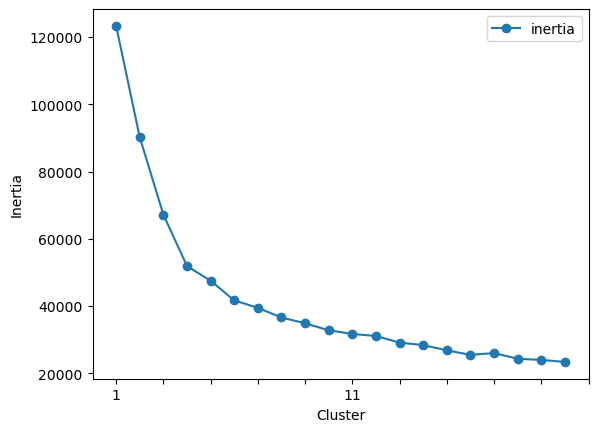

In [15]:
# Analyze for best number of clusters with the elbow method
km_list = list()

for clust in range (1, 21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(shoppers[non_categorical_features])

    km_list.append(pd.Series({'clusters': clust,
                              'inertia': km.inertia_,
                              'model': km}))

plot_data = (pd.concat(km_list, axis=1)
             .T
            [['clusters', 'inertia']]
            .set_index('clusters'))

ax = plot_data.plot(marker='o', ls='-')
ax.set_xticks(range(0, 21, 2))
ax.set_xlim(-1,20)
ax.set(xlabel='Cluster', ylabel='Inertia')

# It looks like 6 clusters would be optimal for inertia. 
# However, the goal is 2 clusters to determine between people who shopped and who did not.

In [16]:
# Hierarchical Agglomerative Clustering with ward linkage
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(shoppers[non_categorical_features])
shoppers['agglom'] = ag.fit_predict(shoppers[non_categorical_features])

In [17]:
# Agglomerative results with ward linkage
(shoppers[['Revenue', 'agglom']]
 .groupby(['agglom', 'Revenue'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
agglom Revenue        
0      False      9723
       True       1905
1      False       699
       True          3

In [18]:
# Hierarchical Agglomerative Clustering with complete/maximum linkage
ag = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True)
ag = ag.fit(shoppers[non_categorical_features])
shoppers['agglom_complete'] = ag.fit_predict(shoppers[non_categorical_features])

In [19]:
# Agglomerative results with complete linkage
(shoppers[['Revenue', 'agglom_complete']]
 .groupby(['agglom_complete', 'Revenue'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
agglom_complete Revenue        
0               False      8673
                True       1360
1               False      1749
                True        548

In [20]:
# Hierarchical Agglomerative Clustering with average linkage
ag = AgglomerativeClustering(n_clusters=2, linkage='average', compute_full_tree=True)
ag = ag.fit(shoppers[non_categorical_features])
shoppers['agglom_average'] = ag.fit_predict(shoppers[non_categorical_features])

In [21]:
# Agglomerative results with average linkage
(shoppers[['Revenue', 'agglom_average']]
 .groupby(['agglom_average', 'Revenue'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
agglom_average Revenue        
0              False      9723
               True       1905
1              False       699
               True          3

In [22]:
# Hierarchical Agglomerative Clustering with single linkage
ag = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True)
ag = ag.fit(shoppers[non_categorical_features])
shoppers['agglom_single'] = ag.fit_predict(shoppers[non_categorical_features])

In [23]:
# Agglomerative results with single linkage
(shoppers[['Revenue', 'agglom_single']]
 .groupby(['agglom_single', 'Revenue'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
agglom_single Revenue        
0             False     10421
              True       1908
1             False         1

### Summary of Models

After testing multiple different models I have found that the KMeans algorithm does the best job at clustering shoppers between who shopped and did not shopped. When referring back to the dataset, 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping. Between two clusters, KMeans found 1440 who shopped and 5744 who did not compared to the variations of agglomerative clustering that found very little who shopped ranging between 0 and 548.

## 5. Insights and Key Findings

The main drivers for these models was to experiment between which model can identify which were shoppers and non shoppers. One of the key findings was that with more complex models such as agglomerative clustering models data points were not split properly to the correct clusters. Although KMeans was not perfect in terms of clustering between shoppers and non shoppers, it proved that simplicity produced better results when clustering. 

## 6. Next Steps

In conclusion, KMeans did produce the the best clustering results because of a simplistic approach to data point assigning to the nearest optimal centroid. For the next steps, I would explore more preprocessing steps to remove potentials outliers in addition to the normalized skewed features. To address current outliers currently in the dataset, I utilized log transformation on the columns that were skewed. Furthermore, I would also explore other methods or models to better separate the shoppers from non shoppers for clustering.